                                                                                         *******     El Mabrouk Oumayma     ******* 


## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.



#### About the Dataset: 
    the dataset is avaible on the link "http://bit.ly/w-data", it contains 2 features: 
        hours: represent the number of hours a student had study 
        score: represent the score achieved by a student in exams 
            

## 1. Uploading the needed ... and data 

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [7]:
import seaborn as sns 

plt.style.use('seaborn')

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

## 2. Exploring Database  

In [4]:
cols=data.columns
print(cols)

Index(['Hours', 'Scores'], dtype='object')


In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 2. visulisation  Data 

C:\Users\MB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64

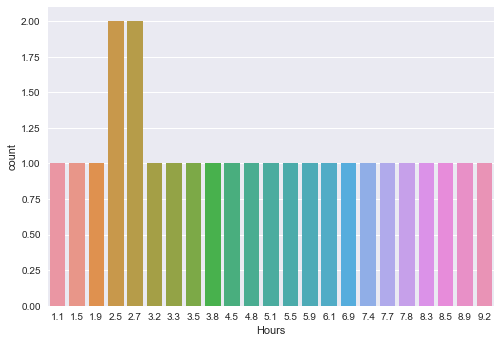

In [8]:
hours= data.Hours
hours
ax=sns.countplot(hours, label='count')
hours.value_counts()


C:\Users\MB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


30    3
95    1
62    1
85    1
86    1
67    1
24    1
69    1
17    1
41    1
42    1
75    1
47    1
76    1
81    1
20    1
21    1
54    1
88    1
25    1
27    1
60    1
35    1
Name: Scores, dtype: int64

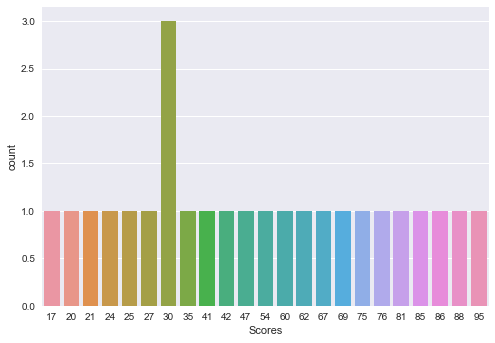

In [9]:
scores= data.Scores
ax=sns.countplot(scores, label='count')
scores.value_counts()

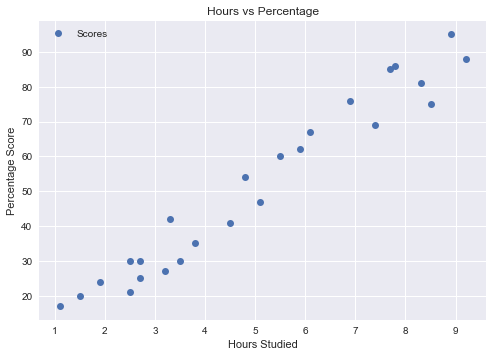

In [10]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

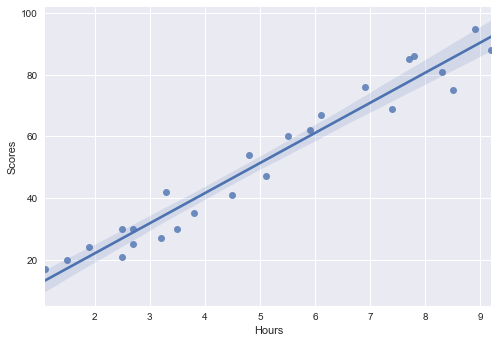

In [11]:
sns.regplot(x="Hours", y="Scores", data=data);

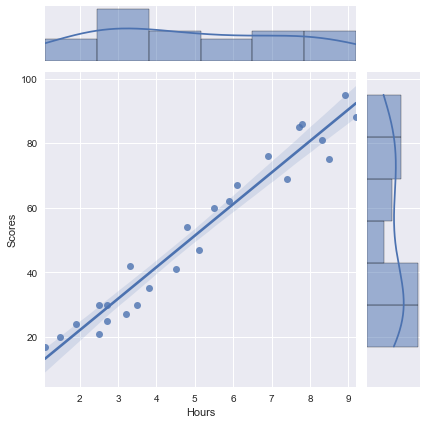

In [12]:
sns.jointplot(x="Hours", y="Scores", data=data, kind="reg");

Text(0.5, 1.0, 'bar')

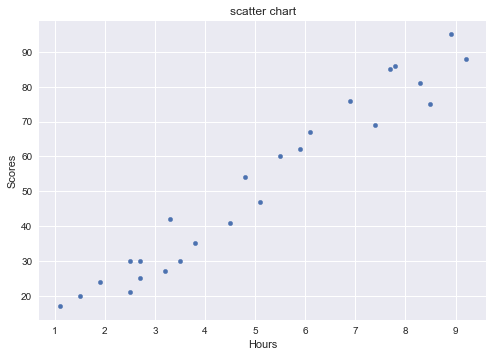

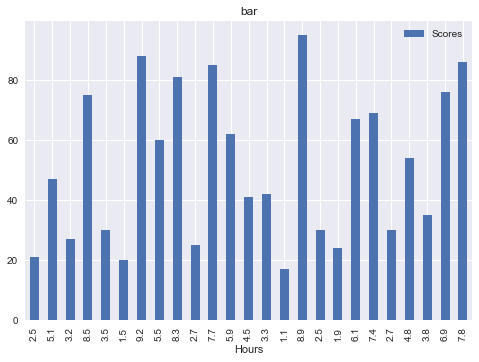

In [14]:
    
# to Plot the graph in Bar chart
data.plot(x="Hours",y="Scores", kind="bar")
plt.title("bar")

  

##  4. Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [15]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [16]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=42) 

## 5.Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [17]:
from sklearn.linear_model import LinearRegression  
regressor_model = LinearRegression()  
regressor_model.fit(X_train, y_train) 

print("Training complete.")

Training complete.


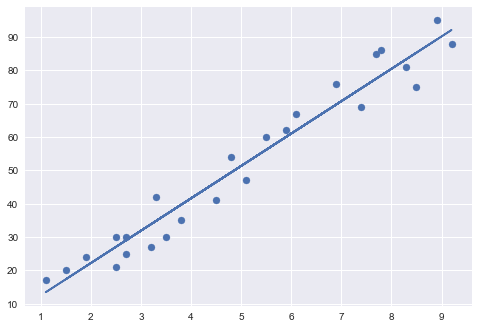

In [19]:
# Plotting the regression line
line = regressor_model.coef_*X+regressor_model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## 6.Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [20]:
print(X_test) # Testing data - In Hours
y_pred = regressor_model.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]
 [2.7]
 [3.3]
 [5.1]]


In [21]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


In [ ]:
X_test

In [22]:
# You can also test with your own data
hours =[[9.25]]

own_pred = regressor_model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.61670033840096


## 7. Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics. 

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.499999999999998


In [24]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error",mean_squared_error(y_test,y_pred))

Mean Squared Error 23.61945761415174


In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9487647340257012
